# Цирук Дмитро

#### Завдання:
Побудувати моделi класифiкацiї на основi методу дерев рiшень, використовуючи sklearn.tree.DecisionTreeClassifier з рiзними значеннями гiперпараметрiв: \
• max_depth – максимальна глибина дерева,
• min_samples_split – мiнiмальна кiлькiсть прикладiв, якi мають бути у вузлi, перш нiж його можна буде розщепити,
• min_samples_leaf – мiнiмальна кiлькiсть прикладiв у листовому вузлi,
• max_leaf_nodes – максимальна кiлькiсть листових вузлiв,
• max_features – максимальна кiлькiсть ознак, якi оцiнюються при розщепленнi кожного вузла.
#### Початковi данi:
(а) import numpy as np \
np.random.seed(0) \
X = np.random.randn(300 , 2 ) \
Y = np.logical_xor(X[:,0] > 0 , X[:,1] > 0) \
(б) sklearn.datasets.load_iris


### Для початку імпортуємо необхідні бібліотеки:

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn import metrics
from sklearn.inspection import DecisionBoundaryDisplay

### Розглянемо перший набір даних:

In [51]:
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype('int32')

### Представимо дані графічно

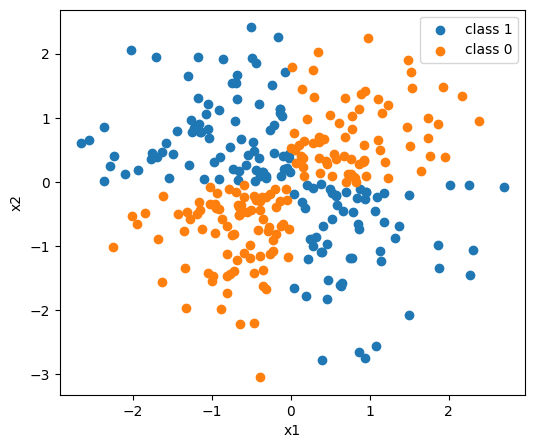

In [52]:
fig, ax = plt.subplots(figsize=(6,5))

data = pd.DataFrame(np.hstack((X, Y.reshape((Y.shape[0], 1)))), columns=['x1', 'x2', 'y'])

ax.scatter(data[data['y'] == 1]['x1'], data[data['y'] == 1]['x2'], label='class 1')
ax.scatter(data[data['y'] == 0]['x1'], data[data['y'] == 0]['x2'], label='class 0')
ax.legend()
ax.set_ylabel('x2')
ax.set_xlabel('x1')
plt.show()

### Розбиваємо дані на два набори: навчальний та валідаційний

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

### Будуємо моделі класифікації

In [54]:
tree1 = DecisionTreeClassifier(max_depth=5, min_samples_split=4, min_samples_leaf=2,
                               max_leaf_nodes=10, max_features=3, random_state=3)
tree2 = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1,
                               max_leaf_nodes=15, max_features=6, random_state=3)
tree3 = DecisionTreeClassifier(max_depth=1, min_samples_split=6, min_samples_leaf=4,
                               max_leaf_nodes=3, max_features=10, random_state=3)
tree2.fit(x_train, y_train)
tree1.fit(x_train, y_train)
tree3.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=1, max_features=10, max_leaf_nodes=3,
                       min_samples_leaf=4, min_samples_split=6, random_state=3)

### Представляємо моделі графічно

In [55]:
def show_tree(model_list, figsize=(14,10)):
    fig, ax = plt.subplots(nrows=3, figsize=figsize)
    for model in model_list:
        graph = tree.plot_tree(model, feature_names=['x1', 'x2'], class_names=['0', '1'], filled=True, ax=ax[model_list.index(model)])
        ax[model_list.index(model)].set_title(f'Дерево {model_list.index(model)+1}')

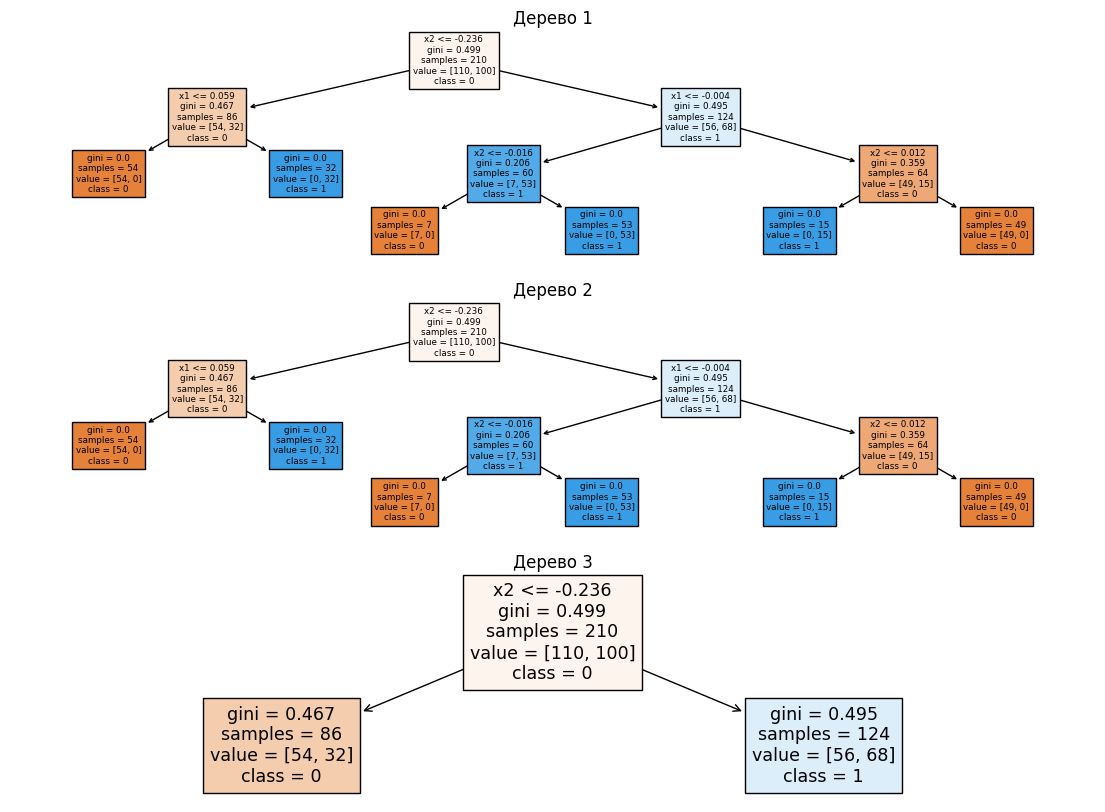

In [56]:
show_tree([tree1, tree2, tree3])

### Виконаємо прогнози

In [57]:
predictions = [model.predict(x_test) for model in [tree1, tree2, tree3]]
i = 1
for predict in predictions:
    print(f'Для дерева {i} маємо прогноз: \n{predict}')
    i += 1

Для дерева 1 маємо прогноз: 
[1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1
 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0
 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1]
Для дерева 2 маємо прогноз: 
[1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1
 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0
 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1]
Для дерева 3 маємо прогноз: 
[1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0
 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1]


### Перенавчання

In [58]:
i = 1
for model in [tree1, tree2, tree3]:
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print(f'Дерево {i}: \nточність тренування - {train_score}; точність тестування - {test_score}')
    i += 1

Дерево 1: 
точність тренування - 1.0; точність тестування - 0.9666666666666667
Дерево 2: 
точність тренування - 1.0; точність тестування - 0.9666666666666667
Дерево 3: 
точність тренування - 0.580952380952381; точність тестування - 0.5777777777777777


Можемо побачити, що перші 2 моделі є перенавченими в деякій мірі, оскільки різниця оцінок передбачень є, хоч і невеликою, але суттєвою ~3.3%. В той час як 3 є недонавченою, оскільки точність на навчальних даних дуже низька.

### Границі рішень

In [59]:
def show_boundary(data, model_list, figsize=(7,14)):
    fig, ax = plt.subplots(nrows=3, figsize=figsize)
    for model in model_list:
        DecisionBoundaryDisplay.from_estimator(model, data[['x1', 'x2']],
                                               response_method='predict', plot_method='pcolormesh', ax=ax[model_list.index(model)])
        ax[model_list.index(model)].scatter(data['x1'], data['x2'], c=data['y'], edgecolor='k')           
        ax[model_list.index(model)].set_title(f'Дерево {model_list.index(model)+1}')

C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


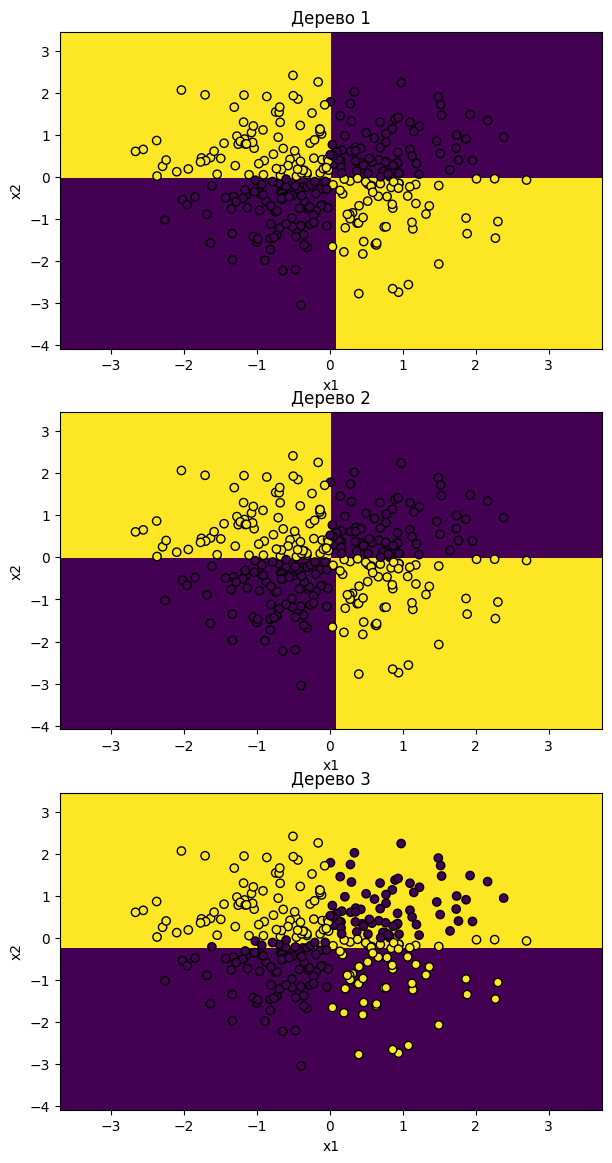

In [60]:
show_boundary(data, [tree1, tree2, tree3])

### Метрики

In [61]:
def calculate_metric(model, metric, x, y):
    pred = model.predict(x)
    return metric(y, pred)

In [62]:
metrics_list = [metrics.confusion_matrix, metrics.precision_score,
           metrics.recall_score, metrics.f1_score]

In [63]:
i=1
for model in [tree1, tree2, tree3]:
    print(f'Tree {i}')
    for metric in metrics_list:
        print(f'_Metric {metric.__name__}')
        print(f'Train: {calculate_metric(model, metric, x_train, y_train)};\nTest: {calculate_metric(model, metric, x_test, y_test)}')
    i += 1
    print('\n')

Tree 1
_Metric confusion_matrix
Train: [[110   0]
 [  0 100]];
Test: [[46  2]
 [ 1 41]]
_Metric precision_score
Train: 1.0;
Test: 0.9534883720930233
_Metric recall_score
Train: 1.0;
Test: 0.9761904761904762
_Metric f1_score
Train: 1.0;
Test: 0.9647058823529412


Tree 2
_Metric confusion_matrix
Train: [[110   0]
 [  0 100]];
Test: [[46  2]
 [ 1 41]]
_Metric precision_score
Train: 1.0;
Test: 0.9534883720930233
_Metric recall_score
Train: 1.0;
Test: 0.9761904761904762
_Metric f1_score
Train: 1.0;
Test: 0.9647058823529412


Tree 3
_Metric confusion_matrix
Train: [[54 56]
 [32 68]];
Test: [[21 27]
 [11 31]]
_Metric precision_score
Train: 0.5483870967741935;
Test: 0.5344827586206896
_Metric recall_score
Train: 0.68;
Test: 0.7380952380952381
_Metric f1_score
Train: 0.6071428571428571;
Test: 0.62




### Решітчастий пошук

In [55]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [1, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4, 5, 6, 10, 14, 16],
    'min_samples_leaf': [1, 2, 3, 4, 10, 14, 16, 20],
    'max_leaf_nodes': [2, 3, 4, 6, 8, 10, 14, 16],
    'max_features': [1, 2, 3, 4, 6, 7, 8, 10]
}

grid_tree = DecisionTreeClassifier()
clf = GridSearchCV(grid_tree, parameters)
clf.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 4, 5, 6, 7, 8],
                         'max_features': [1, 2, 3, 4, 6, 7, 8, 10],
                         'max_leaf_nodes': [2, 3, 4, 6, 8, 10, 14, 16],
                         'min_samples_leaf': [1, 2, 3, 4, 10, 14, 16, 20],
                         'min_samples_split': [2, 3, 4, 5, 6, 10, 14, 16]})

In [56]:
clf.best_params_

{'max_depth': 5,
 'max_features': 2,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [57]:
clf.score(x_test, y_test)

0.9666666666666667

У висновку, оскільки grid search не дав нам кращих результатів, то дерева 1 та 2 є найкращими моделями.

### Навчимо моделі на підмножинах даних

In [60]:
tree1.fit(x_train[:100], y_train[:100])
print('100 екземплярів:', tree1.score(x_test, y_test))
tree1.fit(x_train[:50], y_train[:50])
print('50 екземплярів:', tree1.score(x_test, y_test))
tree1.fit(x_train[:30], y_train[:30])
print('30 екземплярів:', tree1.score(x_test, y_test))

100 екземплярів: 0.9555555555555556
50 екземплярів: 0.9777777777777777
30 екземплярів: 0.6666666666666666


Як бачимо, загалом, точність на валідаційних даних падає, але можуть бути і виключення

### Розглянемо другий набір даних:

In [64]:
from sklearn.datasets import load_iris
iris = load_iris()

### Представимо дані графічно

In [65]:
X, Y = iris.data, iris.target
data = pd.DataFrame(np.hstack((X, Y.reshape(Y.shape[0], 1))), columns=iris.feature_names+['target'])
data['target'].replace([0,1,2], iris.target_names, inplace=True)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Розбиваємо на навчальний та валідаційний набори

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

### Будуємо моделі

In [67]:
tree1 = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=1,
                               max_leaf_nodes=15, max_features=8, random_state=3)
tree2 = DecisionTreeClassifier(max_depth=4, min_samples_split=6, min_samples_leaf=3,
                               max_leaf_nodes=6, max_features=6, random_state=3)
tree3 = DecisionTreeClassifier(max_depth=3, min_samples_split=6, min_samples_leaf=4,
                               max_leaf_nodes=3, max_features=10, random_state=3)
tree2.fit(x_train, y_train)
tree1.fit(x_train, y_train)
tree3.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=10, max_leaf_nodes=3,
                       min_samples_leaf=4, min_samples_split=6, random_state=3)

### Представляємо моделі графічно

In [68]:
def show_tree(model_list, figsize=(14,14)):
    fig, ax = plt.subplots(nrows=3, figsize=figsize)
    for model in model_list:
        graph = tree.plot_tree(model, feature_names=load_iris().feature_names, class_names=load_iris().target_names, 
                               filled=True, ax=ax[model_list.index(model)])
        ax[model_list.index(model)].set_title(f'Дерево {model_list.index(model)+1}')

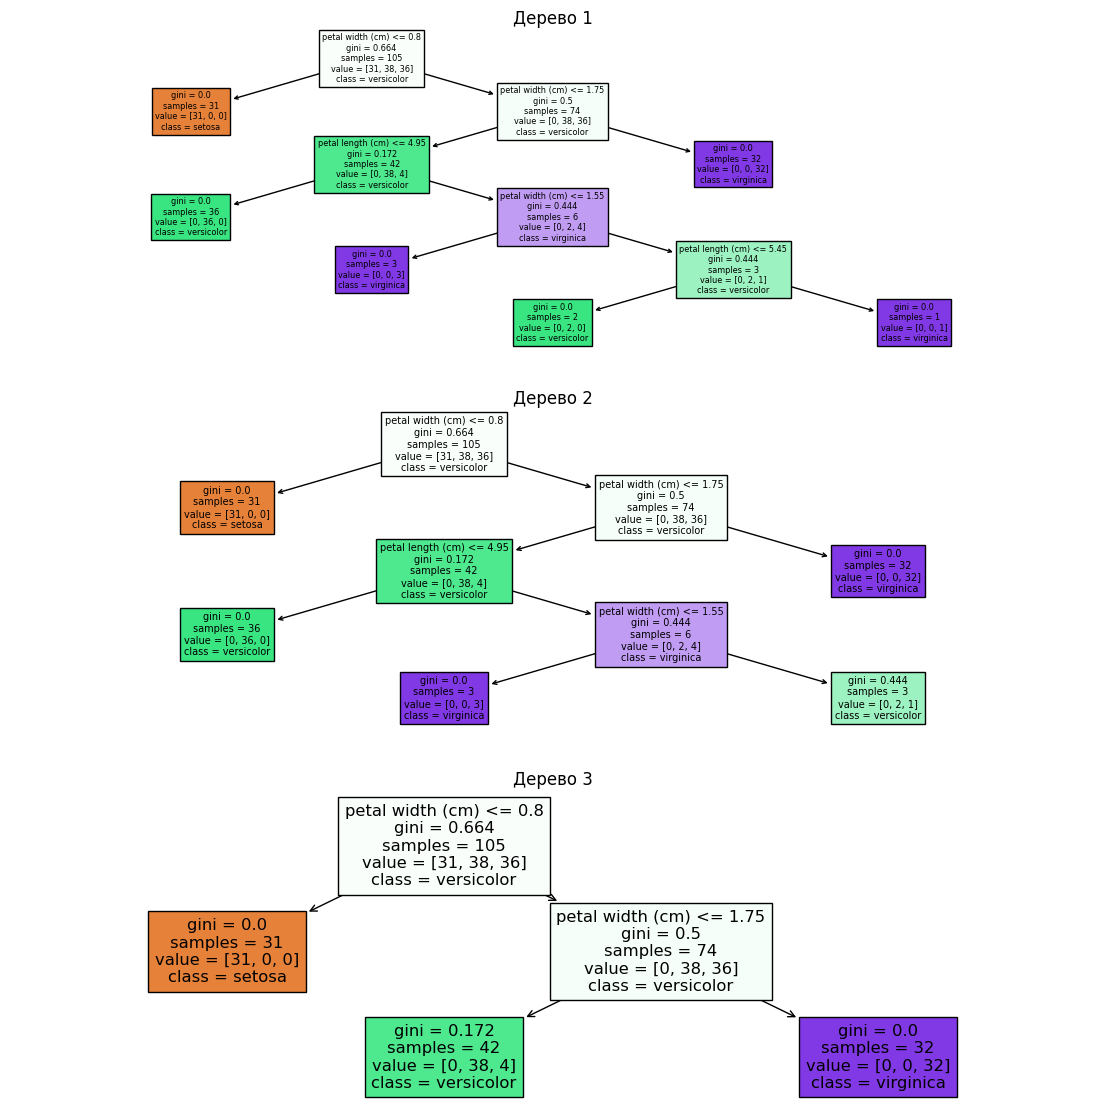

In [69]:
show_tree([tree1, tree2, tree3])

### Виконаємо прогнози

In [75]:
predictions = [model.predict(x_test) for model in [tree1, tree2, tree3]]
i = 1
for predict in predictions:
    print(f'Для дерева {i} маємо прогноз: \n{predict}')
    i += 1

Для дерева 1 маємо прогноз: 
[1 1 0 2 0 1 0 2 2 2 0 1 0 2 0 1 1 0 1 2 0 0 2 0 0 0 1 2 2 0 2 0 1 1 0 2 0
 0 2 2 2 1 1 0 0]
Для дерева 2 маємо прогноз: 
[1 1 0 2 0 1 0 2 2 2 0 1 0 2 0 1 1 0 1 2 0 0 2 0 0 0 1 2 2 0 2 0 1 1 0 2 0
 0 2 2 2 1 1 0 0]
Для дерева 3 маємо прогноз: 
[1 1 0 2 0 1 0 2 2 2 0 1 0 2 0 1 1 0 1 2 0 0 2 0 0 0 1 2 2 0 2 0 1 1 0 2 0
 0 2 2 2 1 1 0 0]


### Перенавчання

In [76]:
i = 1
for model in [tree1, tree2, tree3]:
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print(f'Дерево {i}: \nточність тренування - {train_score}; точність тестування - {test_score}')
    i += 1

Дерево 1: 
точність тренування - 1.0; точність тестування - 0.9555555555555556
Дерево 2: 
точність тренування - 0.9904761904761905; точність тестування - 0.9555555555555556
Дерево 3: 
точність тренування - 0.9619047619047619; точність тестування - 0.9555555555555556


Можемо зробити висновок, що дерево 1 є перенавченим, оскільки має хорошу точність на навчальних даних, але на незнайомих даних програє іншим моделям. Дерево 2 та 3 не є перенавченими, оскільки мають досить малу різницю оцінок для валідаційного і тренувального наборів даних

### Границі рішень

In [71]:
from sklearn.base import clone

data['target'].replace(iris.target_names, [0,1,2], inplace=True)

def show_boundary(data, model_list, feature_names, x_train, y_train, figsize=(7,14)):
    fig, ax = plt.subplots(nrows=3, figsize=figsize)
    for model in model_list:
        m = clone(model)
        m.fit(x_train[:, [0,1]], y_train)
        DecisionBoundaryDisplay.from_estimator(m, data[feature_names],
                                               response_method='predict', plot_method='pcolormesh', ax=ax[model_list.index(model)])
        ax[model_list.index(model)].scatter(data[feature_names[0]], data[feature_names[1]], c=data['target'], edgecolor='k')           
        ax[model_list.index(model)].set_title(f'Дерево {model_list.index(model)+1}')

C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


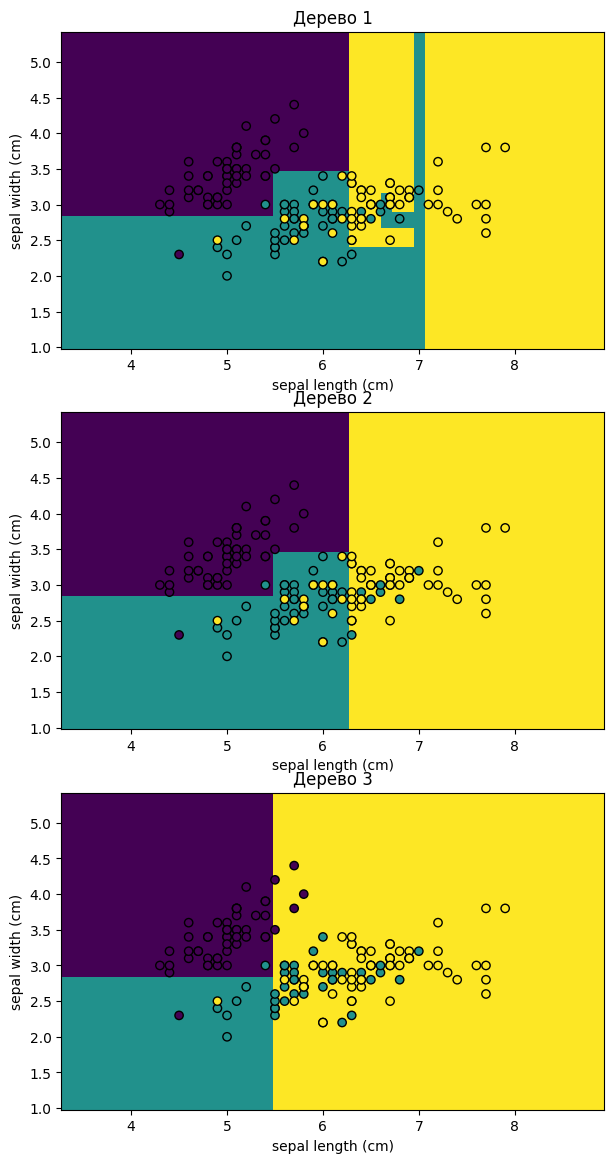

In [72]:
show_boundary(data, [tree1, tree2, tree3], iris.feature_names[:2], x_train, y_train)

### Метрики

In [73]:
def calculate_metric_b(model, metric, x, y, average='binary'):
    pred = model.predict(x)
    if metric.__name__ != 'confusion_matrix':
        return metric(y, pred, average=average)
    else:
        return metric(y, pred)

In [74]:
i=1
for model in [tree1, tree2, tree3]:
    print(f'Tree {i}')
    for metric in metrics_list:
        print(f'_Metric {metric.__name__}')
        print(f'Train: {calculate_metric_b(model, metric, x_train, y_train, "micro")};\nTest: {calculate_metric_b(model, metric, x_test, y_test, "micro")}')
    i += 1
    print('\n')

Tree 1
_Metric confusion_matrix
Train: [[31  0  0]
 [ 0 38  0]
 [ 0  0 36]];
Test: [[19  0  0]
 [ 0 11  1]
 [ 0  1 13]]
_Metric precision_score
Train: 1.0;
Test: 0.9555555555555556
_Metric recall_score
Train: 1.0;
Test: 0.9555555555555556
_Metric f1_score
Train: 1.0;
Test: 0.9555555555555556


Tree 2
_Metric confusion_matrix
Train: [[31  0  0]
 [ 0 38  0]
 [ 0  1 35]];
Test: [[19  0  0]
 [ 0 11  1]
 [ 0  1 13]]
_Metric precision_score
Train: 0.9904761904761905;
Test: 0.9555555555555556
_Metric recall_score
Train: 0.9904761904761905;
Test: 0.9555555555555556
_Metric f1_score
Train: 0.9904761904761905;
Test: 0.9555555555555556


Tree 3
_Metric confusion_matrix
Train: [[31  0  0]
 [ 0 38  0]
 [ 0  4 32]];
Test: [[19  0  0]
 [ 0 11  1]
 [ 0  1 13]]
_Metric precision_score
Train: 0.9619047619047619;
Test: 0.9555555555555556
_Metric recall_score
Train: 0.9619047619047619;
Test: 0.9555555555555556
_Metric f1_score
Train: 0.9619047619047619;
Test: 0.9555555555555556




### Решітчастий пошук

In [82]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [1, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4, 5, 6, 10, 14, 16],
    'min_samples_leaf': [1, 2, 3, 4, 10, 14, 16, 20],
    'max_leaf_nodes': [2, 3, 4, 6, 8, 10, 14, 16, 20, 30],
    'max_features': [1, 2, 3, 4, 6, 7, 8, 10]
}

grid_tree = DecisionTreeClassifier(random_state=5)
clf = GridSearchCV(grid_tree, parameters)
clf.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'max_depth': [1, 3, 4, 5, 6, 7, 8],
                         'max_features': [1, 2, 3, 4, 6, 7, 8, 10],
                         'max_leaf_nodes': [2, 3, 4, 6, 8, 10, 14, 16, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4, 10, 14, 16, 20],
                         'min_samples_split': [2, 3, 4, 5, 6, 10, 14, 16]})

In [83]:
clf.best_params_

{'max_depth': 4,
 'max_features': 2,
 'max_leaf_nodes': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [84]:
clf.score(x_test, y_test)

0.9555555555555556

In [86]:
clf.score(x_train, y_train)

0.9809523809523809

Найкраща модель, яка в нас вийшла - дерево 1, оскільки має таку ж точність на незнайомих даних, як у інших моделей, але найвищу точність на навчальних даних